# Business Case: Yulu - Hypothesis Testing

## About Yulu

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

## Problem Statement

The company wants to know:
 - Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

 - How well those variables describe the electric cycle demands

## Exploratory Data Analysis:

In [ ]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing Modules for Statistical Analysis
from scipy.stats import ttest_ind,f_oneway, levene, kruskal, shapiro, chi2_contingency
from statsmodels.graphics.gofplots import qqplot

In [ ]:
# Excluding Warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Importing Data
yulu_df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")

In [ ]:
df = yulu_df.copy()
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Row and Column Count
print(f"Row Count: {df.shape[0]} \nColumn Count: {df.shape[1]}")

Row Count: 10886 
Column Count: 12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Insights:
- There are 10886 rows and 12 columns in the dataset.
- The column 'datetime' is in object format. We need to convert it to datetime format.
- The columns 'season', 'holiday', 'workingday', 'weather', 'humidity', 'casual', 'resgistered' and 'count are in integer format. Here, 'season', 'holiday', 'workingday' and 'weather' are categorical variables.
- The columns 'temp', 'atemp', 'windspeed' are in float format.

In [ ]:
# Converting Date Column to Datetime
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
# Converting Categorical Columns to Category
cat_col = ['season', 'holiday', 'workingday', 'weather']
for col in cat_col:
    df[col] = df[col].astype('category')

In [ ]:
# Creating new columns from datetime which will be used as categorical columns
df['year'] = df['datetime'].dt.year.astype('category')
df['month'] = df['datetime'].dt.strftime('%B').astype('category')
df['day'] = df['datetime'].dt.day.astype('category')
df['hour'] = df['datetime'].dt.hour.astype('category')

In [ ]:
# Replacing Number with Category
df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace=True)
df['weather'].replace({1: 'Clear', 2: 'Cloudy', 3: 'Rainy', 4: 'Heavy Rain'}, inplace=True)
df['holiday'].replace({0: 'No', 1: 'Yes'}, inplace=True)
df['workingday'].replace({0: 'No', 1: 'Yes'}, inplace=True)

In [ ]:
df.sample(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
2698,2011-07-01 08:00:00,Fall,No,Yes,Clear,28.70,31.820,42,11.0014,39,453,492,2011,July,1,8
1397,2011-04-04 02:00:00,Summer,No,Yes,Clear,15.58,19.695,66,16.9979,1,1,2,2011,April,4,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  category      
 13  month       10886 non-null  category      
 14  day         10886 non-null  category      
 15  hour        10886 non-null  category      
dtypes: category(8), dateti

In [ ]:
df.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [ ]:
df.describe(include='category')

,season,holiday,workingday,weather,year,month,day,hour
count,10886,10886,10886,10886,10886,10886,10886,10886
unique,4,2,2,4,2,12,19,24
top,Winter,No,Yes,Clear,2012,August,1,12
freq,2734,10575,7412,7192,5464,912,575,456


Insights (Numerical Variables):
- The data is available for 2 years from 01-01-2011 to 19-12-2012.
- For temp, atemp, humidity, and windspeed, the mean and the median is approcimately same. This indicates that the data is normally distributed. Will confirm through other tests.
- The data is not normally distributed for casual, registered and count. This is because the mean and median are different.
- For casual, registered and count, mean is higher than median. This indicates that the data is right-skewed.

Insights (Categorical Variables):
- Most of the rentals are done in Winter season.
- Likewise, most of the rentals were done on working days.
- In the same way, most of the rentals were done on 2012.

In [ ]:
df.isna().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


Insights:
- There is no missing data in the dataset.

In [ ]:
df.duplicated().sum()

0

Insights:
- There are no duplicate rows in the dataset.

In [ ]:
df.nunique()

,0
datetime,10886
season,4
holiday,2
workingday,2
weather,4
temp,49
atemp,60
humidity,89
windspeed,28
casual,309


Insights:
- There are 4 seasons and weathers in the dataset.
- There are 2 boolean variables such as holiday and workingday in the dataset.
- Rental happened in all 24 hours of the day and on all months.

In [ ]:
# skewness of the numerical columns
df.skew(numeric_only=True)

,0
temp,0.003691
atemp,-0.102560
humidity,-0.086335
windspeed,0.588767
casual,2.495748
registered,1.524805
count,1.242066


Insights:
- The 'temp' variable exhibits skewness values close to zero, suggesting relatively symmetrical distributions.
- Variables such as 'windspeed', 'casual', 'registered', and 'count' demonstrate positive skewness, pointing to a concentration of lower values and a rightward skew in their distributions.
- In contrast, 'atemp', and 'humidity' exhibit negative skewness, implying a concentration of higher values and a leftward skew in their distributions.

In [ ]:
cat_col = df.select_dtypes(include='category').columns
for col in cat_col:
    print(f"Unique Values in {col}: \n{df[col].unique()}\n")

Unique Values in season: 
['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Spring', 'Summer', 'Fall', 'Winter']

Unique Values in holiday: 
['No', 'Yes']
Categories (2, object): ['No', 'Yes']

Unique Values in workingday: 
['No', 'Yes']
Categories (2, object): ['No', 'Yes']

Unique Values in weather: 
['Clear', 'Cloudy', 'Rainy', 'Heavy Rain']
Categories (4, object): ['Clear', 'Cloudy', 'Rainy', 'Heavy Rain']

Unique Values in year: 
[2011, 2012]
Categories (2, int32): [2011, 2012]

Unique Values in month: 
['January', 'February', 'March', 'April', 'May', ..., 'August', 'September', 'October', 'November', 'December']
Length: 12
Categories (12, object): ['April', 'August', 'December', 'February', ..., 'May', 'November',
                          'October', 'September']

Unique Values in day: 
[1, 2, 3, 4, 5, ..., 15, 16, 17, 18, 19]
Length: 19
Categories (19, int32): [1, 2, 3, 4, ..., 16, 17, 18, 19]

Unique Values in hour: 
[0, 1, 2, 3, 4, ..., 19, 20, 21, 22, 23]
Lengt

## Univariate Analysis And BiVariate Analysis

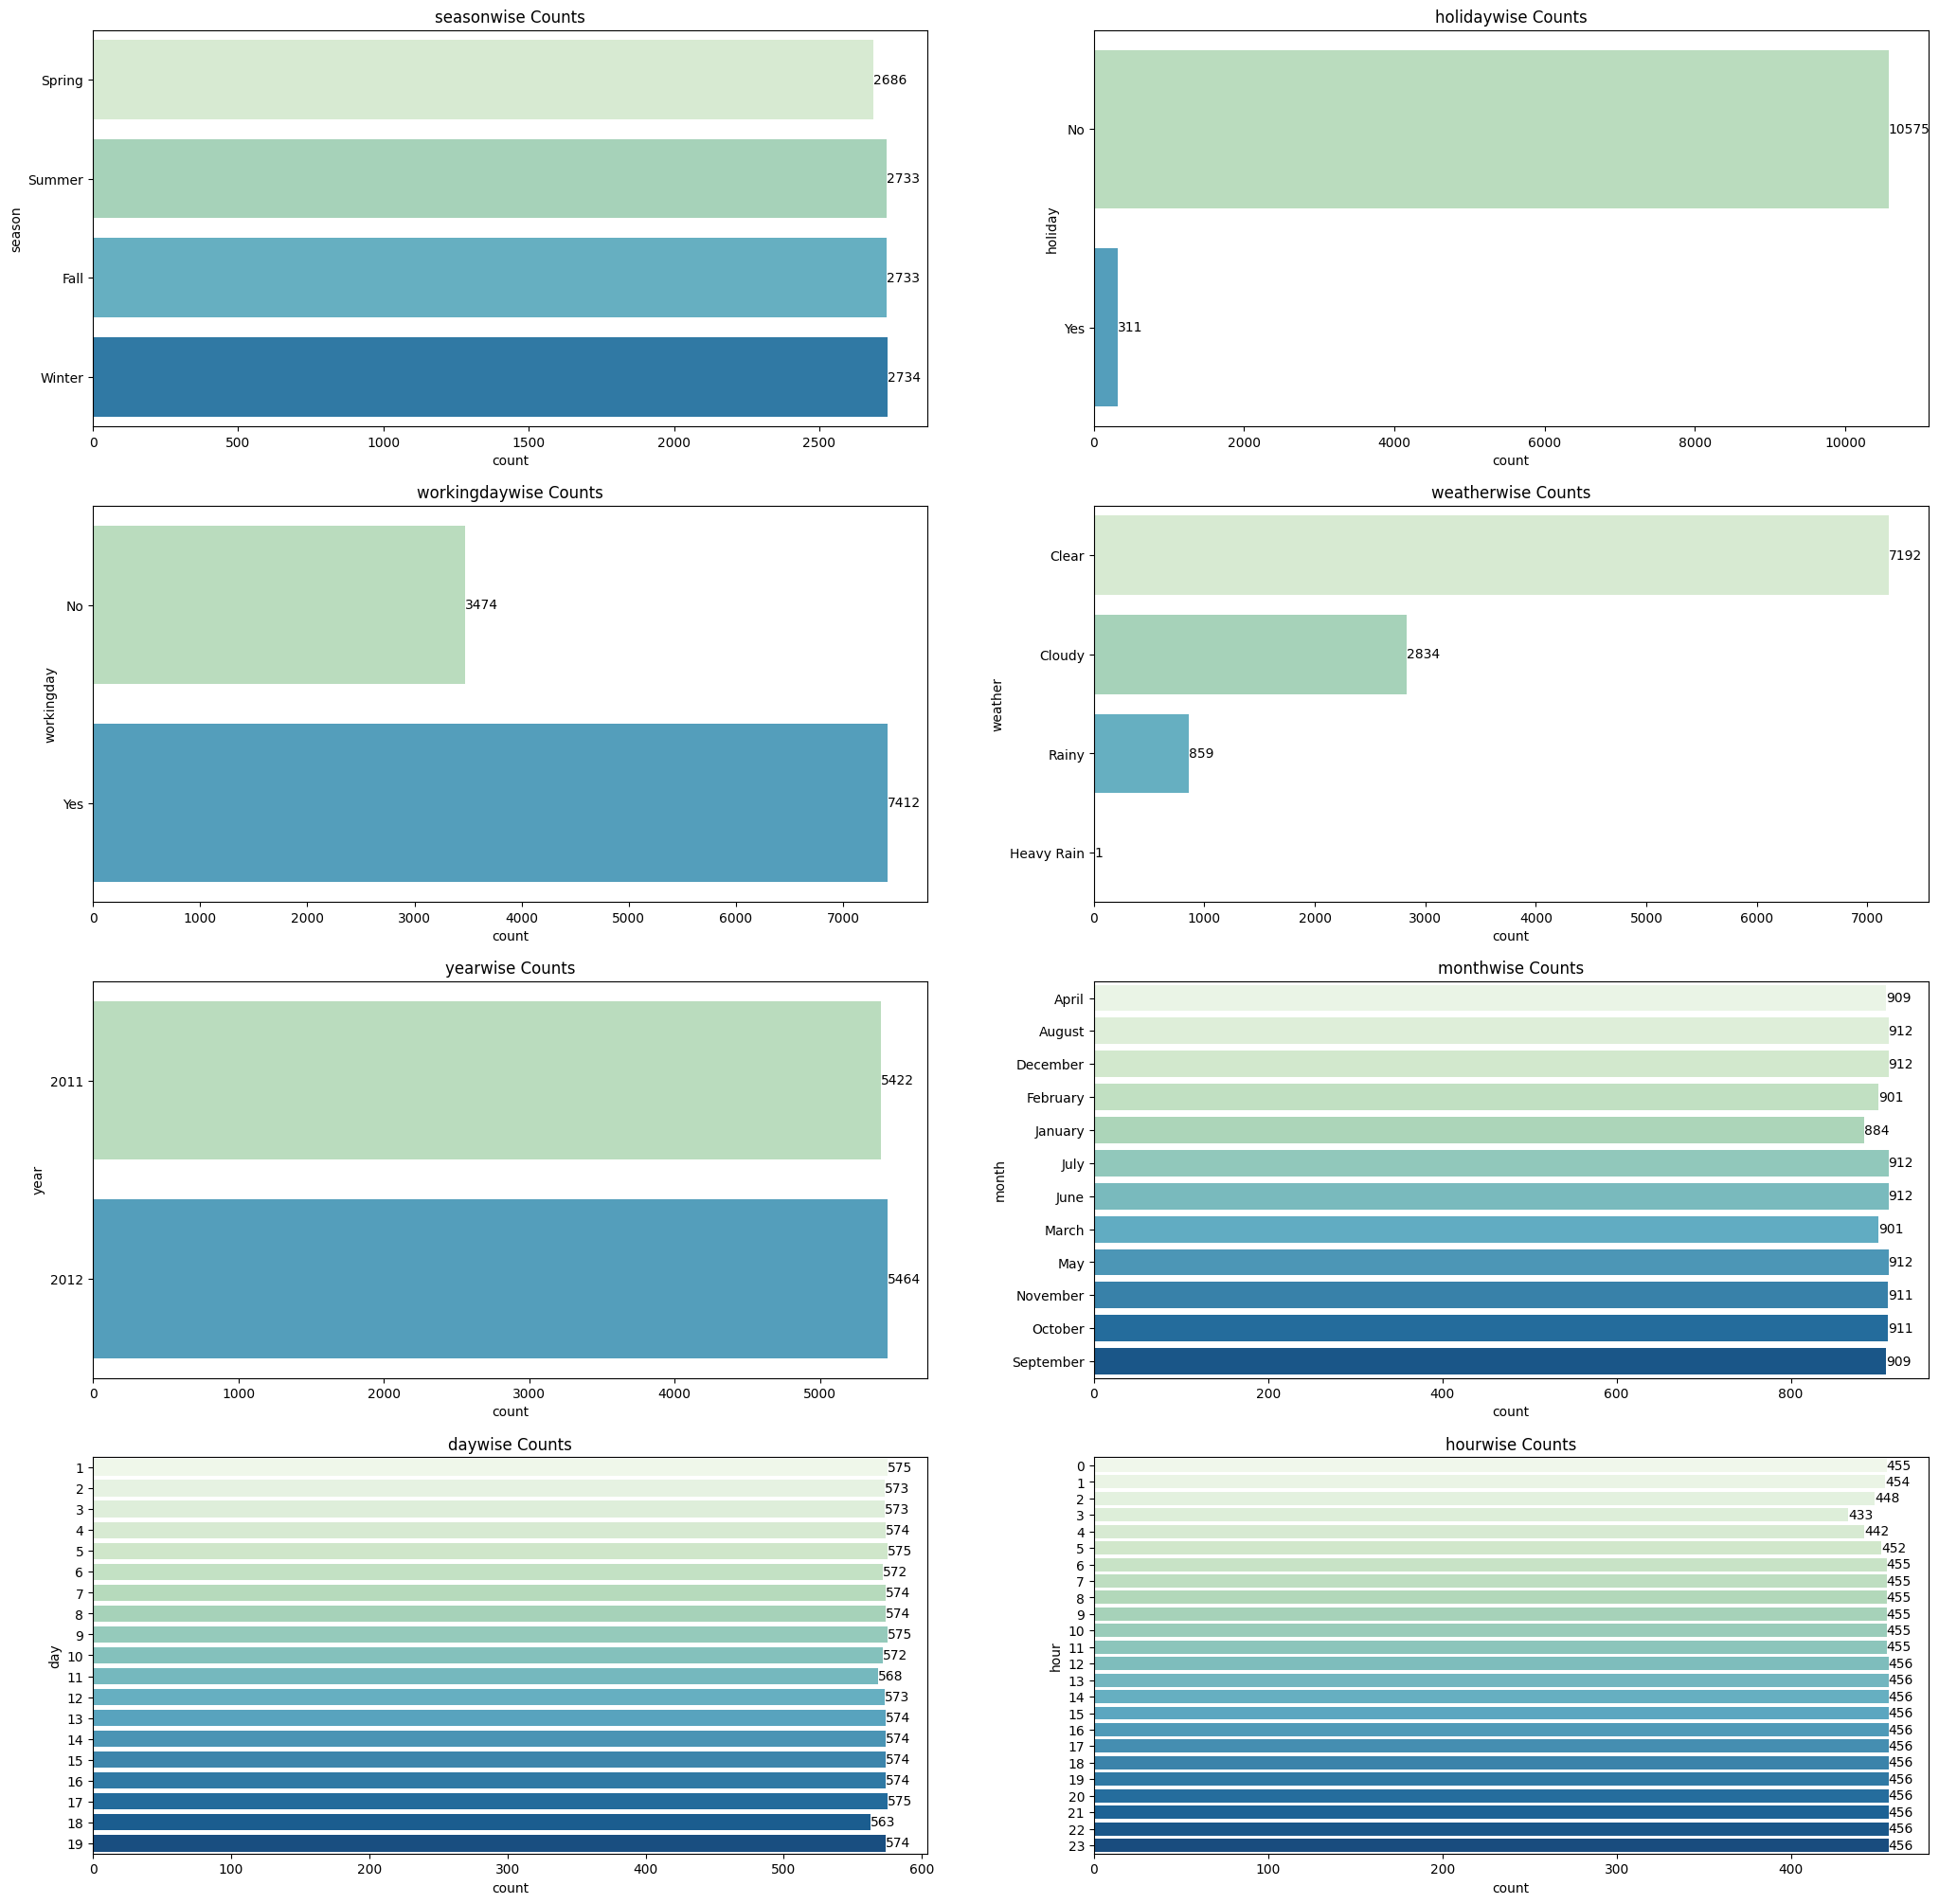

In [ ]:
plt.figure(figsize=(25,25))

i=1
for col in cat_col:
  plt.subplot(4,2,i)
  a=sns.countplot(data=df, y=df[col],palette='GnBu')
  plt.title(f'{col}wise Counts')
  for container in a.containers:
      a.bar_label(container, label_type='edge')
  i+=1

Insights:
- Same as the insights from the EDA, the categorical counts were represented in the form of bar plots.

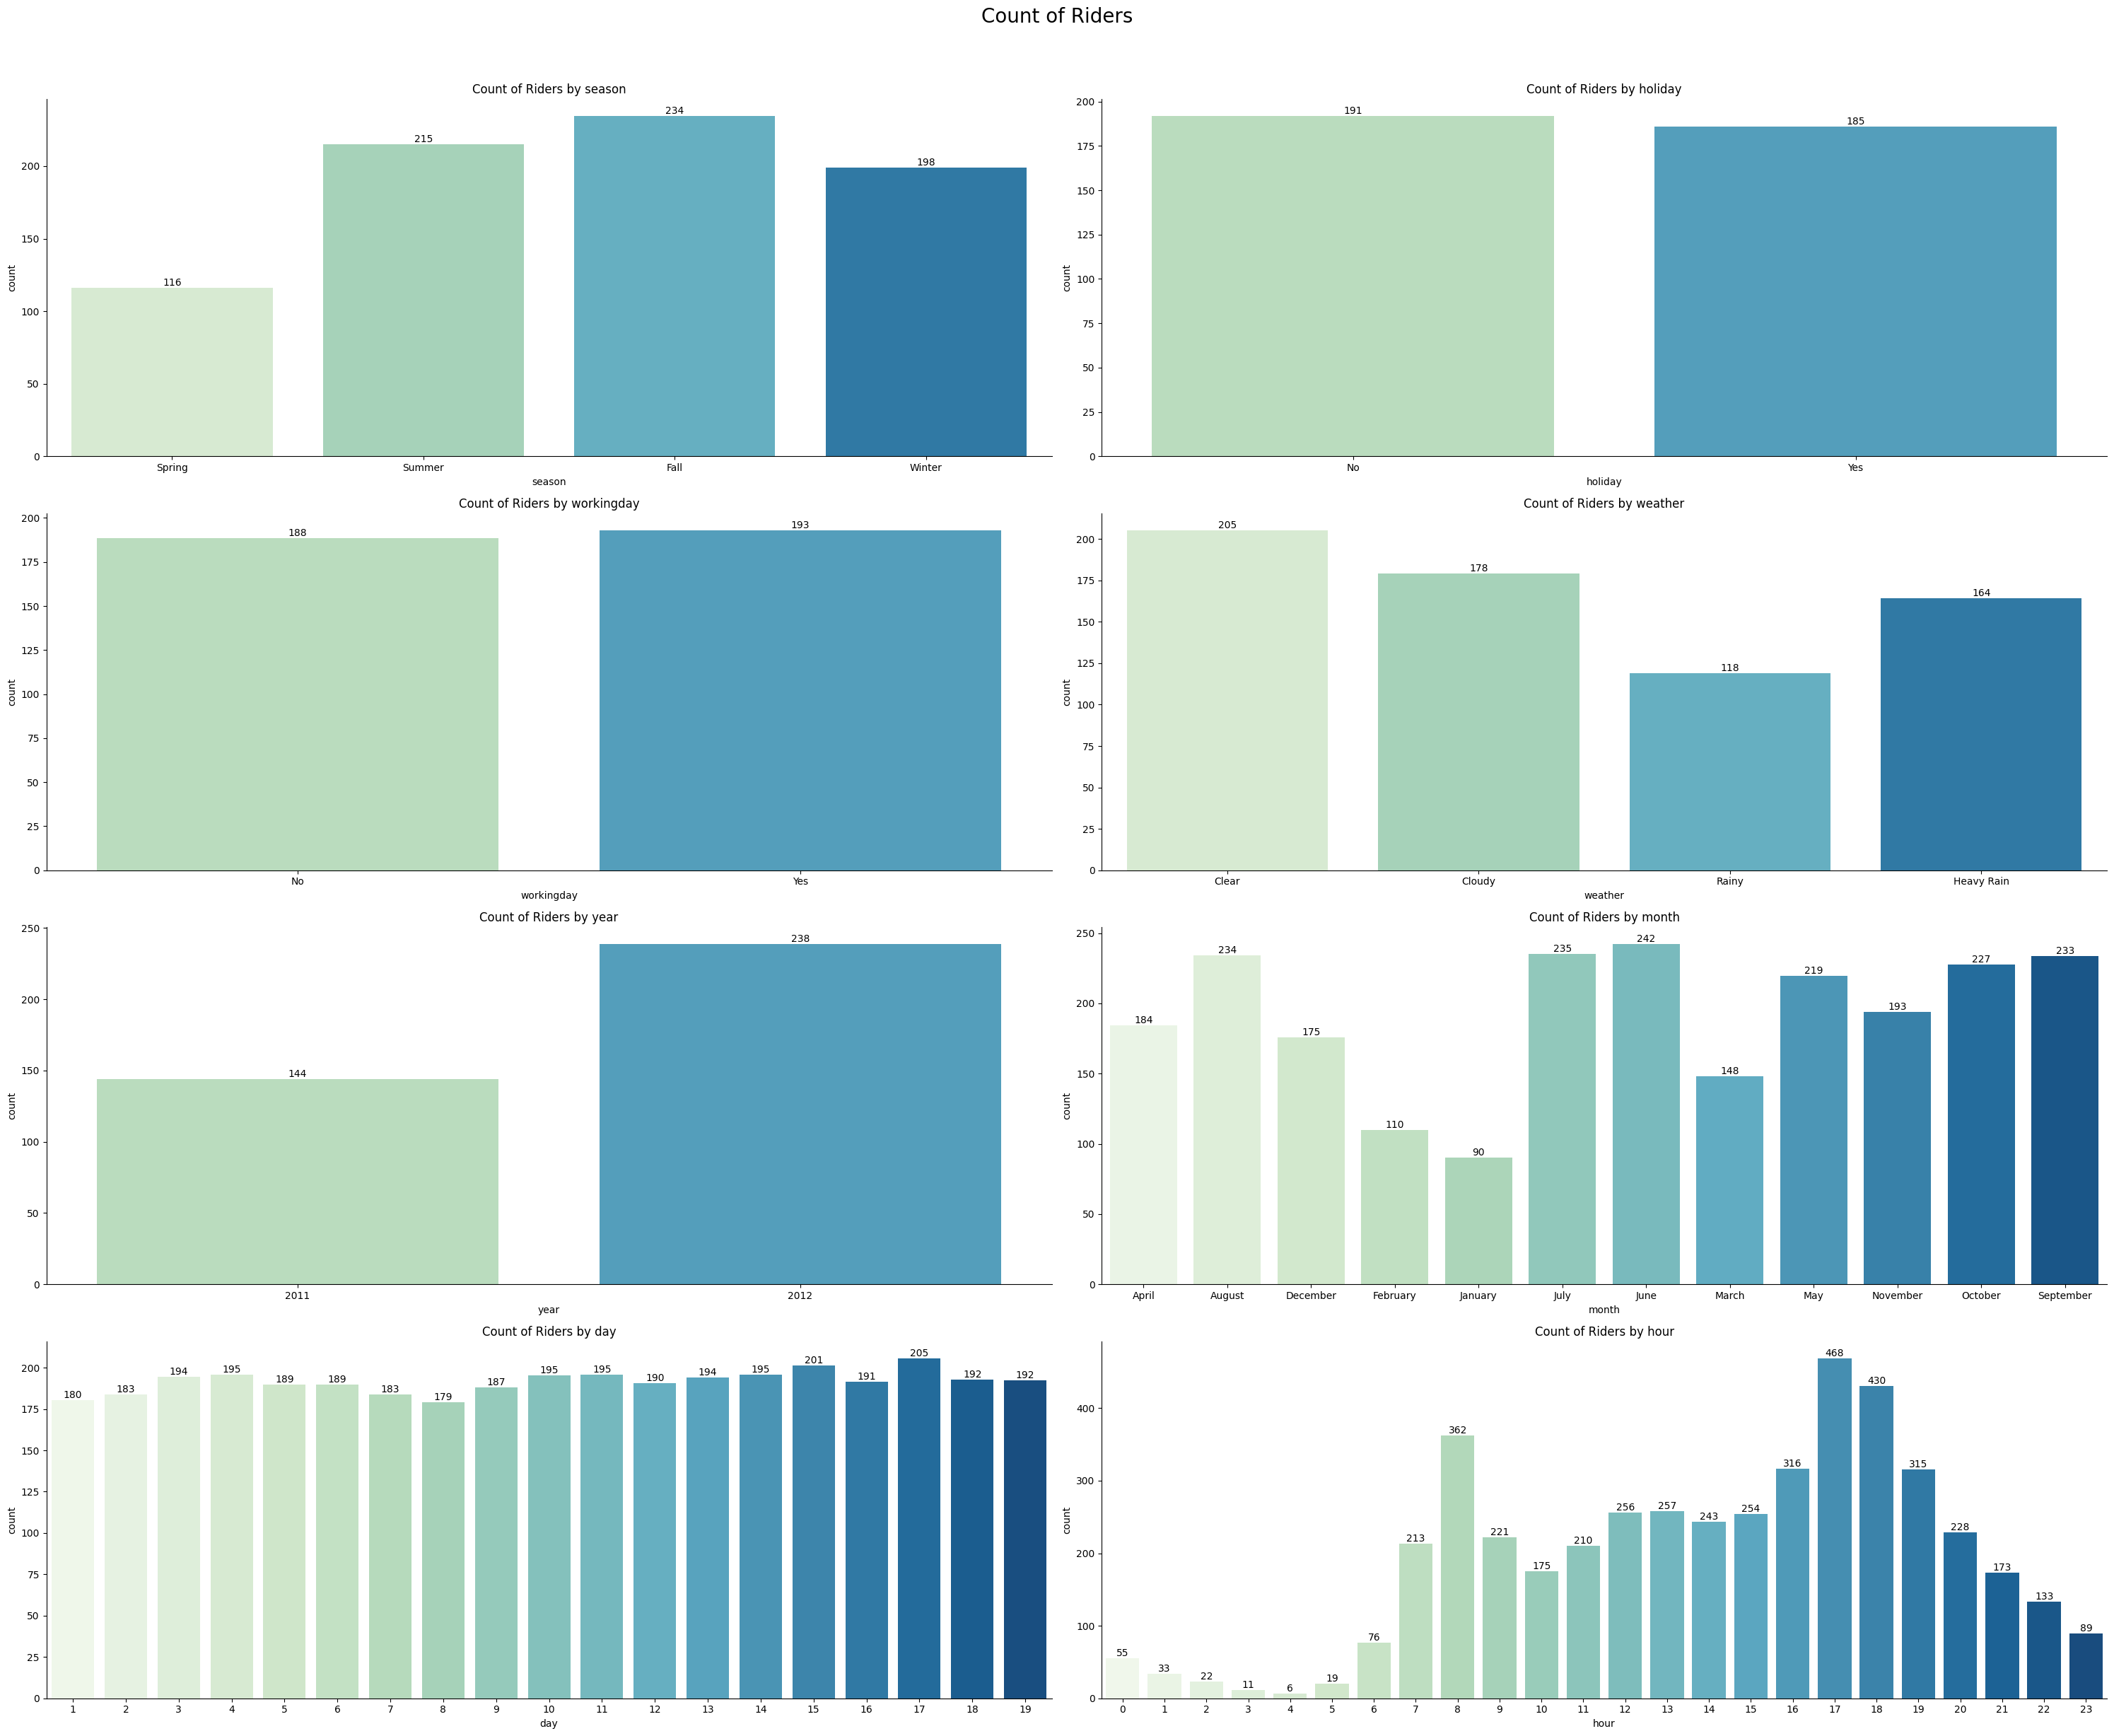

In [ ]:
plt.figure(figsize=(30, 25))
plt.suptitle('Count of Riders', fontsize=20)

categories = df.select_dtypes(include='category').columns
titles = ['Count of Riders by season', 'Count of Riders by holiday', 'Count of Riders by workingday', 'Count of Riders by weather', 'Count of Riders by year', 'Count of Riders by month', 'Count of Riders by day', 'Count of Riders by hour']

for i, (category, title) in enumerate(zip(categories, titles), 1):
    plt.subplot(4, 2, i)
    b = sns.barplot(data=df, x=category, y='count', palette='GnBu', ci=None)
    for container in b.containers:
        b.bar_label(container, fmt='%d')
    plt.title(title)
    # plt.xticks(rotation=45)  # Rotate x-axis labels to avoid overlap

sns.despine()
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


Insights:
- Number of rentals done in each category of season, holiday, workingday, weather, and year were displayed in the form of bar plots.
- Fall has the highest number of rentals, followed by Summer, Winter and Spring.
- Working day has the highest number of rentals, followed by non-working day.
- 2012 has the highest number of rentals, followed by 2011.
- June had the highest number of rentals, followed by July, August, May, September, October, April, November, March, December, February, and January.
- Clear weather has the highest number of rentals, followed by Cloudy, Heavy Rain, and Light Rain.

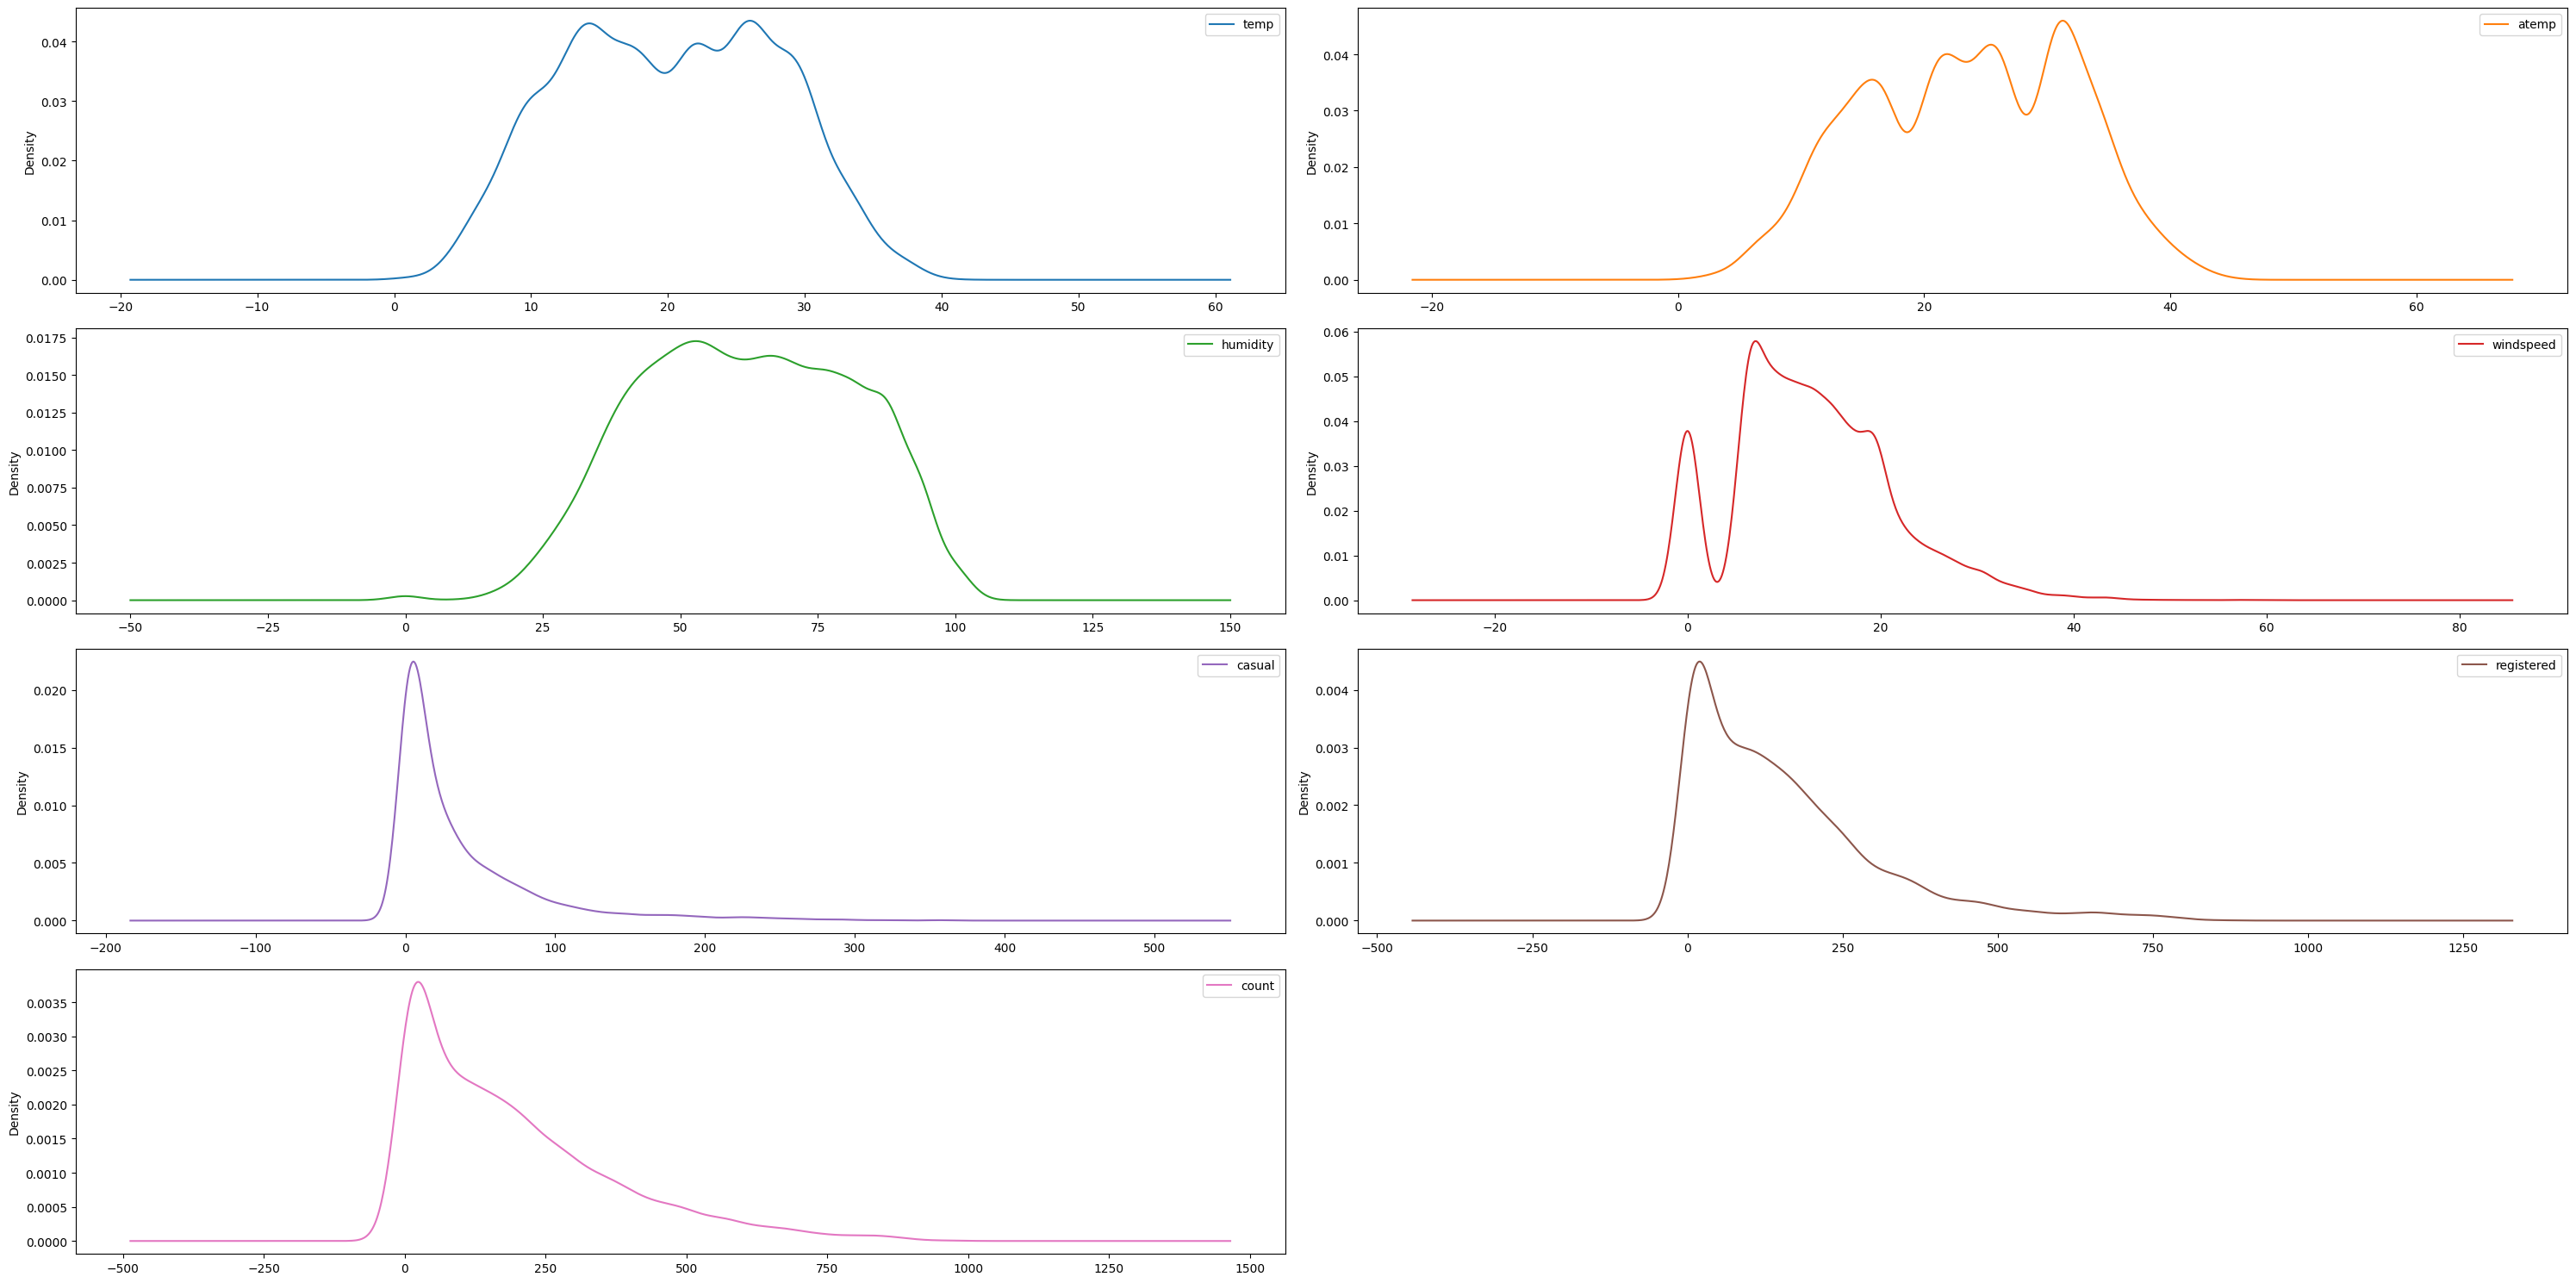

In [ ]:
# KDE Plot for Numerical Columns to check the distribution
df[df.select_dtypes(include='number').columns].plot(kind='kde', subplots=True, layout=(4, 2), sharex=False, sharey=False, figsize=(30, 15))
plt.tight_layout()
plt.show()

Insights:
- Same as we saw in skew analysis in EDA, the distribution of the numerical variables were represented in the form of KDE plots.
- Casual, Registered and Count have right-skewed distributions.
- Temp, Atemp, Windspeed and Humidity have normal distributions as most of the data points are concentrated around the mean. Will confirm it through Shapiro Wilk test.

In [ ]:
# Shapiro-Wilk Test for Normality
for col in df.select_dtypes(include='number').columns:
    stat, p = shapiro(df[col])
    print(f'\nShapiro-Wilk Test for {col}: \nStatistics={stat}, p-value={p}')
    if p > 0.05:
        print(f'At 95% Confidence Interval, {col} is Normally Distributed\n')
    else:
        print(f'At 95% Confidence Interval, {col} is Not Normally Distributed')
    print('-'*50)


Shapiro-Wilk Test for temp: 
Statistics=0.9804052990118979, p-value=4.4416921644612106e-36
At 95% Confidence Interval, temp is Not Normally Distributed
--------------------------------------------------

Shapiro-Wilk Test for atemp: 
Statistics=0.9815304574471947, p-value=3.220898326923054e-35
At 95% Confidence Interval, atemp is Not Normally Distributed
--------------------------------------------------

Shapiro-Wilk Test for humidity: 
Statistics=0.982258701470504, p-value=1.2220289155107286e-34
At 95% Confidence Interval, humidity is Not Normally Distributed
--------------------------------------------------

Shapiro-Wilk Test for windspeed: 
Statistics=0.9587337923764818, p-value=7.590114681771609e-48
At 95% Confidence Interval, windspeed is Not Normally Distributed
--------------------------------------------------

Shapiro-Wilk Test for casual: 
Statistics=0.7056347316275473, p-value=3.5447963283866637e-87
At 95% Confidence Interval, casual is Not Normally Distributed
----------

Insights:
- Based on the results, all the p-values are less than 0.05. Hence, we reject the null hypothesis. This indicates that the data is not normally distributed.
- Statistically, all the numerical variables are not normally distributed.

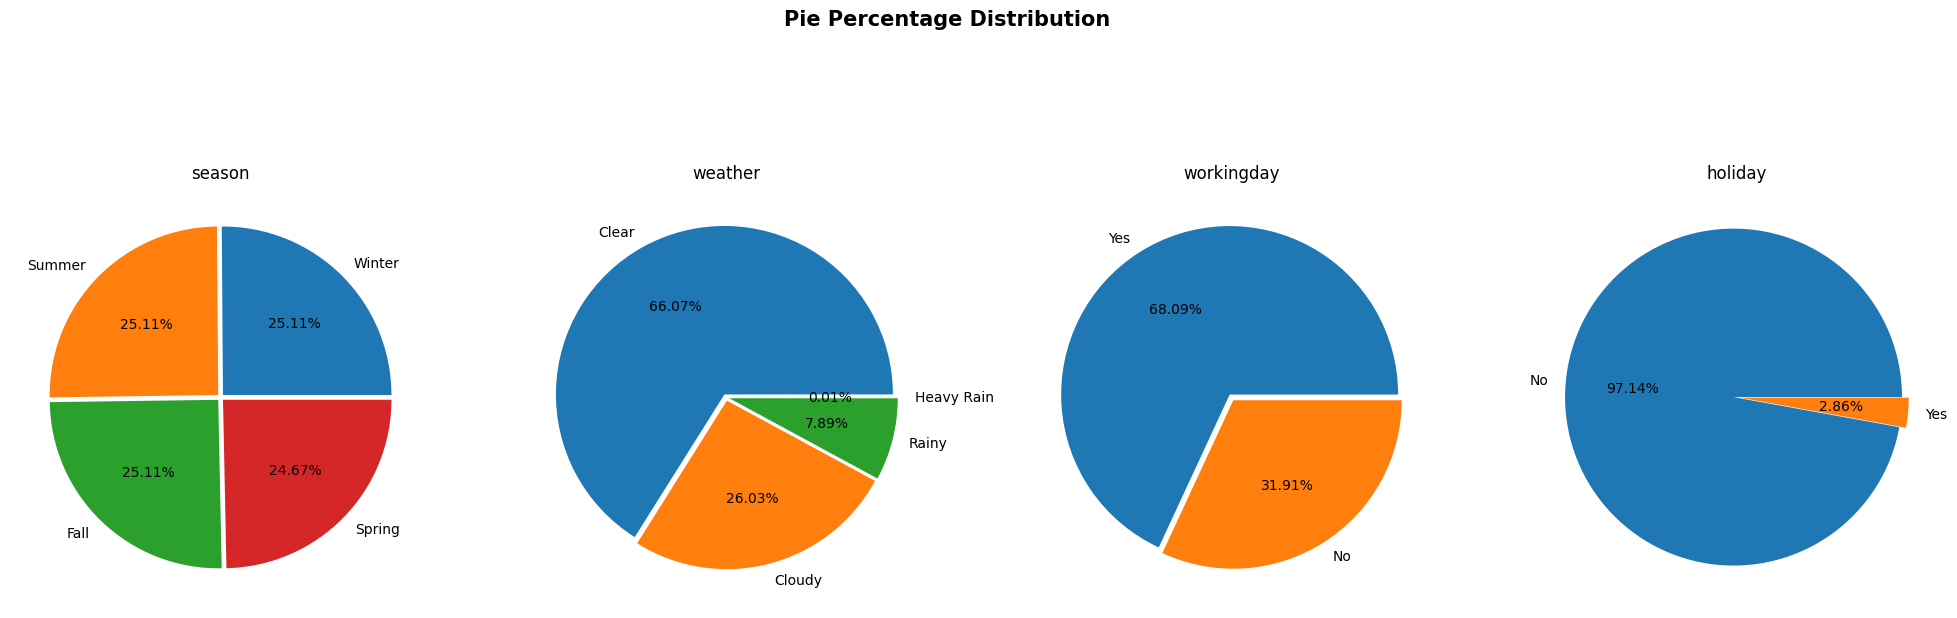

In [ ]:
# Percentage Distribution
plt.figure(figsize=(25, 8))
plt.suptitle('Pie Percentage Distribution', fontsize=15, fontweight='bold')

subplots = ["season", 'weather', 'workingday', 'holiday']
ind = 141

for col in subplots:
    plt.subplot(ind)
    plt.pie(df[col].value_counts(), labels=df[col].value_counts().index, explode=[0.02]*df[col].unique().size, autopct= '%.2f%%')
    plt.title(col)
    ind+=1


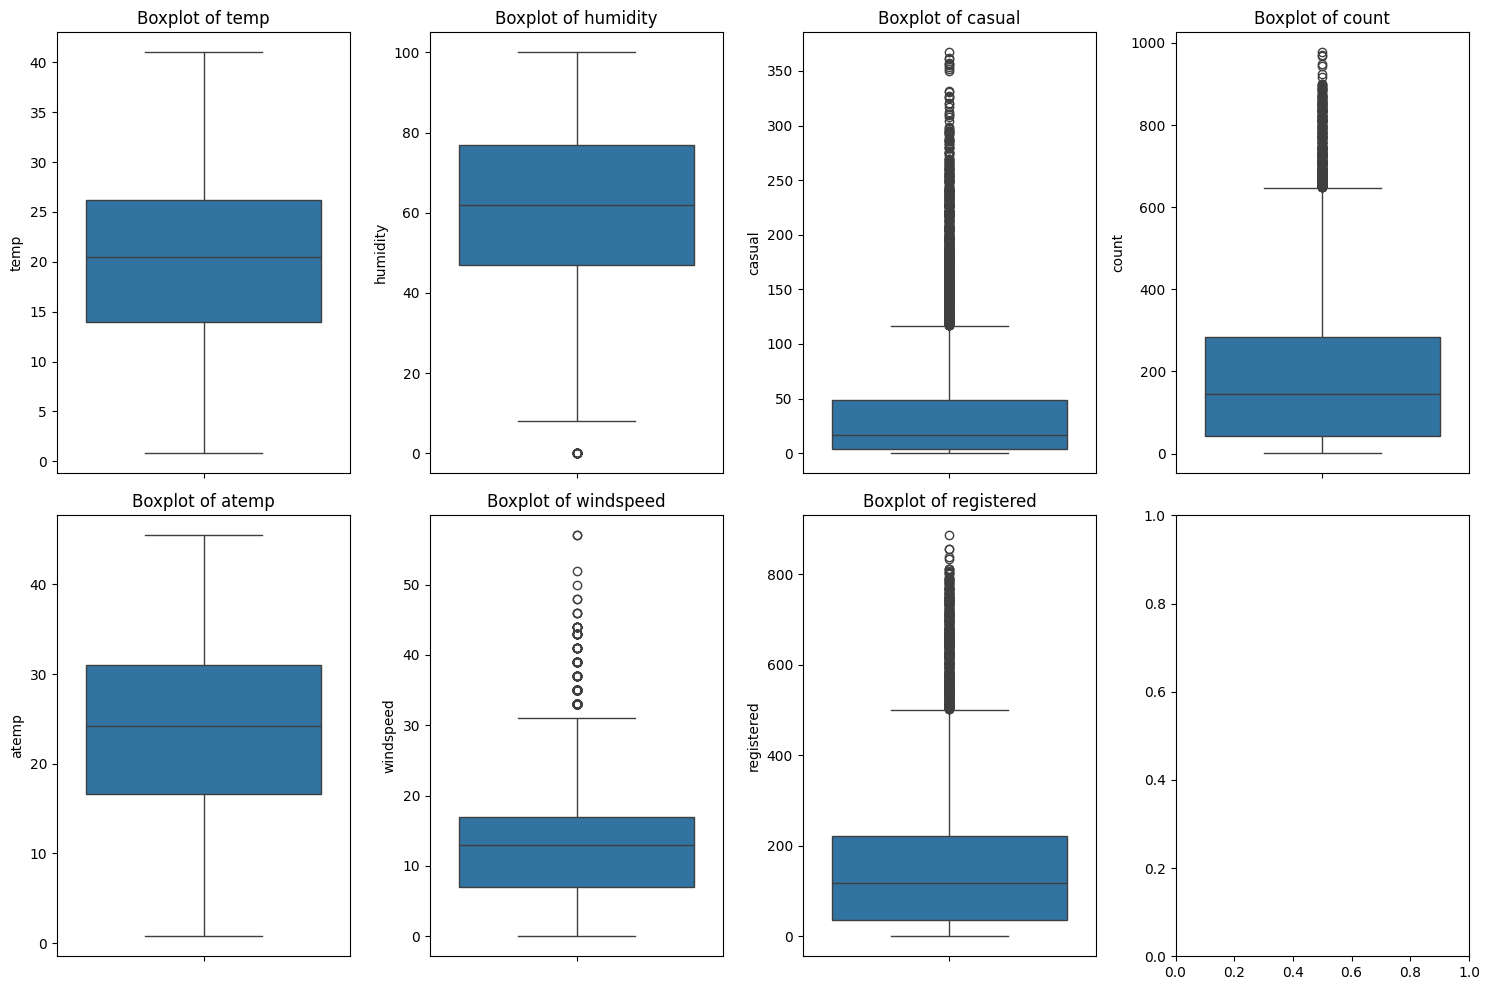

In [ ]:
#  Outlier Detection
num_col = df.select_dtypes(include='number').columns

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
for i, col in enumerate(num_col):
    sns.boxplot(data=df, y=col, ax=axes[i%2, i//2])
    axes[i%2, i//2].set_title(f'Boxplot of {col}')
fig.tight_layout()
plt.show()

In [ ]:
num_cols = df.select_dtypes(include='number')

# obtain the first quartile
Q1 = num_cols.quantile(0.25)

# obtain the third quartile
Q3 = num_cols.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

temp           12.3000
atemp          14.3950
humidity       30.0000
windspeed       9.9964
casual         45.0000
registered    186.0000
count         242.0000
dtype: float64


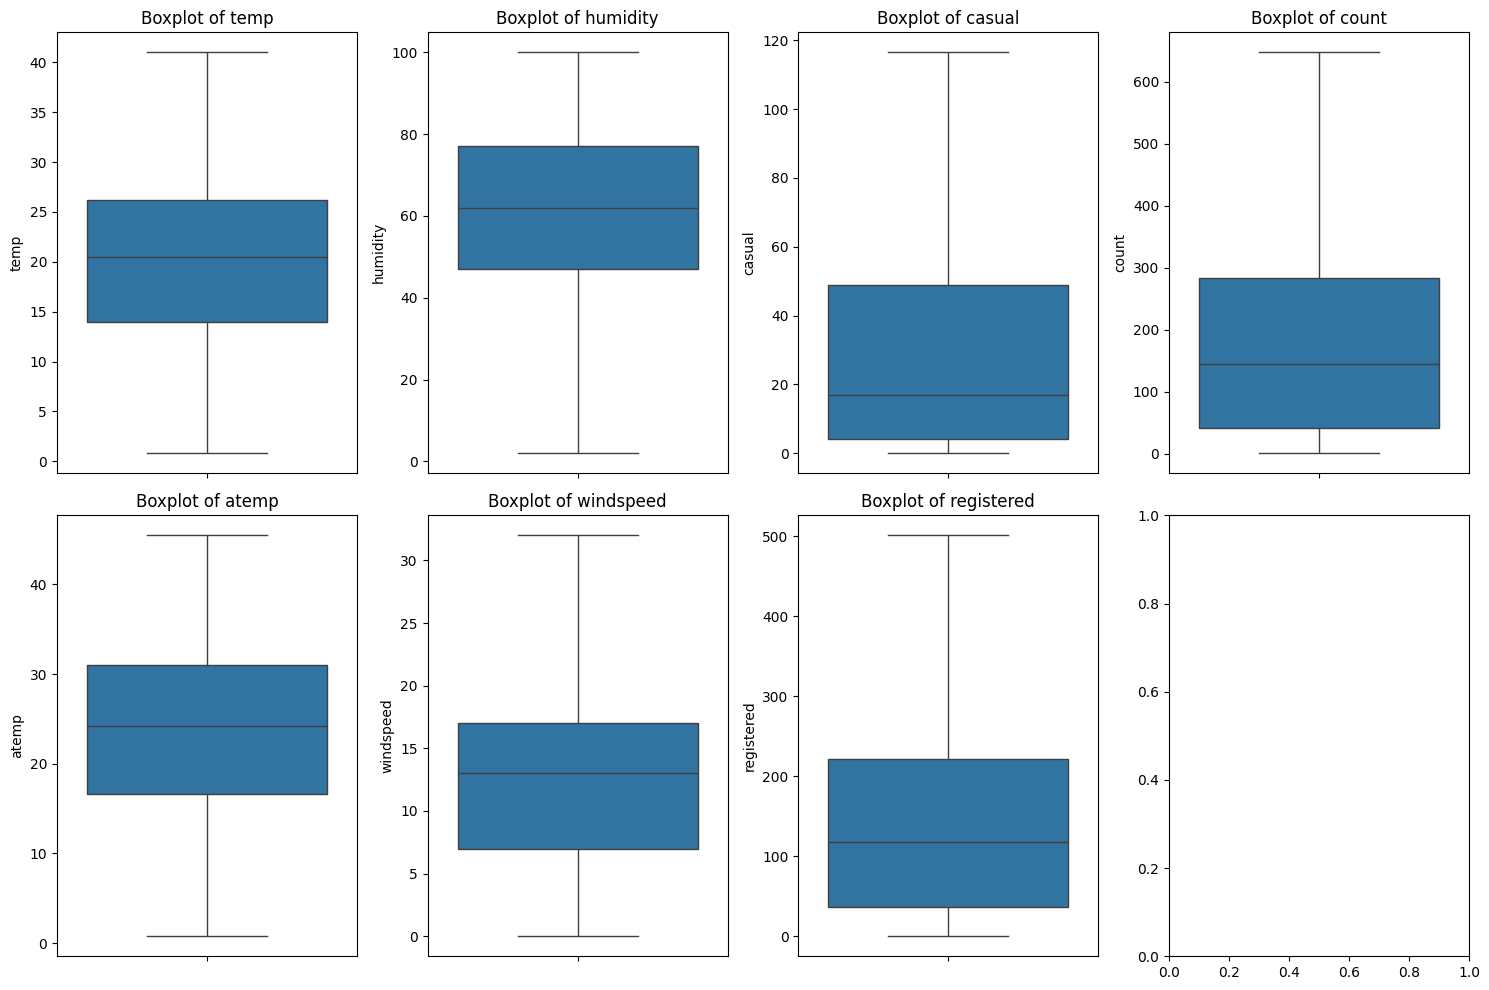

In [ ]:
# Impute the Outliers with the IQR method
Q1 = df.select_dtypes(include='number').quantile(0.25)
Q3 = df.select_dtypes(include='number').quantile(0.75)
IQR = Q3 - Q1

# Imputing Outliers using a loop
for col in num_col:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Checking for Outliers after Imputation
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
for i, col in enumerate(num_col):
    sns.boxplot(data=df, y=col, ax=axes[i%2, i//2])
    axes[i%2, i//2].set_title(f'Boxplot of {col}')
fig.tight_layout()
plt.show()

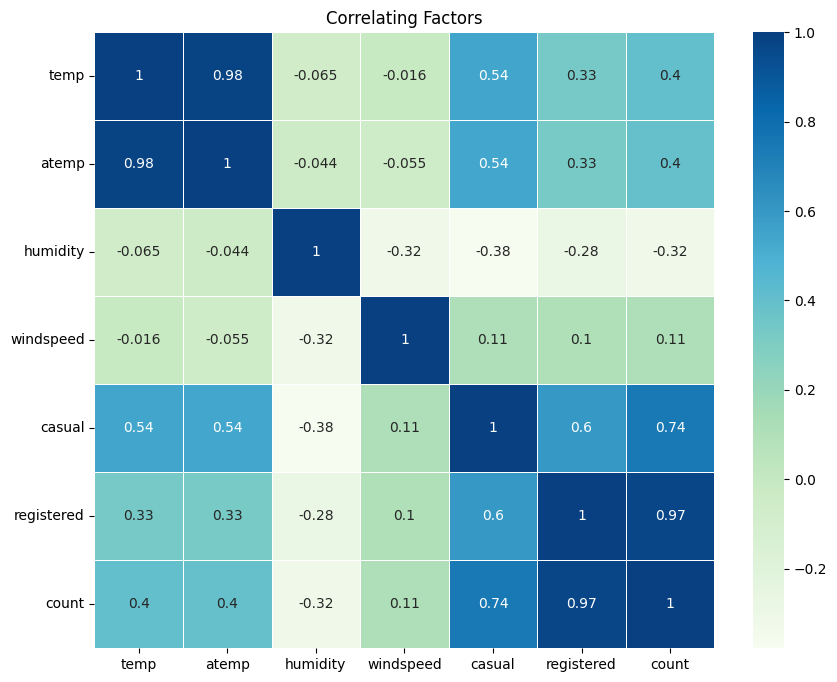

In [ ]:
corr_df =  df.corr(numeric_only=True)
# display(corr_df)
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidth=.5,cmap='GnBu')
plt.yticks(rotation=0)
plt.title('Correlating Factors')
plt.show()

Insights:
- The correlation matrix was represented in the form of a heatmap.
- The variables 'temp' and 'atemp' are highly correlated with each other.
- The variables 'casual' and 'registered' are highly correlated with the target variable 'count'.
- The variables 'temp', 'atemp', 'windspeed', 'casual', and 'registered' are correlated with the target variable 'count'.
- The variables 'humidity' is negatively correlated with the all the variables.
- The variables 'windspeed' is negatively correlated with the 'humidity', 'temp' and 'atemp'.

## Hypothesis Testing


### Check Working Day has effect on number of electric cycles rented

2 Sample T-Test will be the suitable test to check the effect of Working Day on cycle rental

Assumptions for Two Sample T-Test:
- The data is normally distributed.
- The data is homoscedastic. This means that the variance in the data is equal.
- The data is independent.

Step 1: Define the null hypothesis and alternative hypothesis
- Null Hypothesis: Working Day has no effect on the number of electric cycles rented.
- Alternative Hypothesis: Working Day has an effect on the number of electric cycles rented.

Step 2: Checking the basic assumptions
- To check the normal distribution, will use QQ Plot and Shapiro.
- To check the variance, will use Levene's Test.

Step 3: Fix the significance level
- Significance Level: 0.05

Step 4: Perform the test

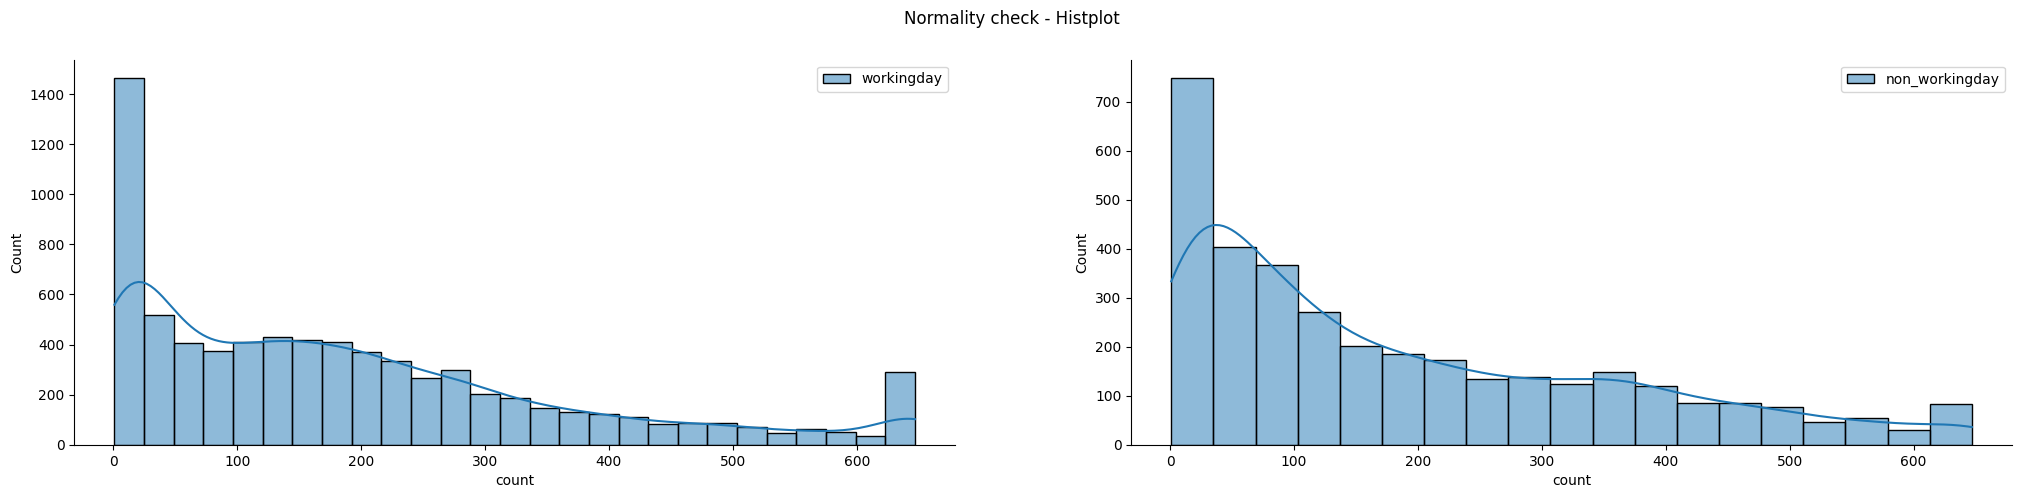

In [ ]:
workingDay_df = df[df['workingday'] == 'Yes']['count']
nonWorkingDay_df = df[df['workingday'] == 'No']['count']
plt.figure(figsize = (25, 5))
plt.suptitle("Normality check - Histplot")
plt.subplot(121)
sns.histplot(workingDay_df, kde = True, label = 'workingday')
plt.legend()
plt.subplot(122)
sns.histplot(nonWorkingDay_df, kde = True, label = 'non_workingday')
plt.legend()
sns.despine()
plt.show()


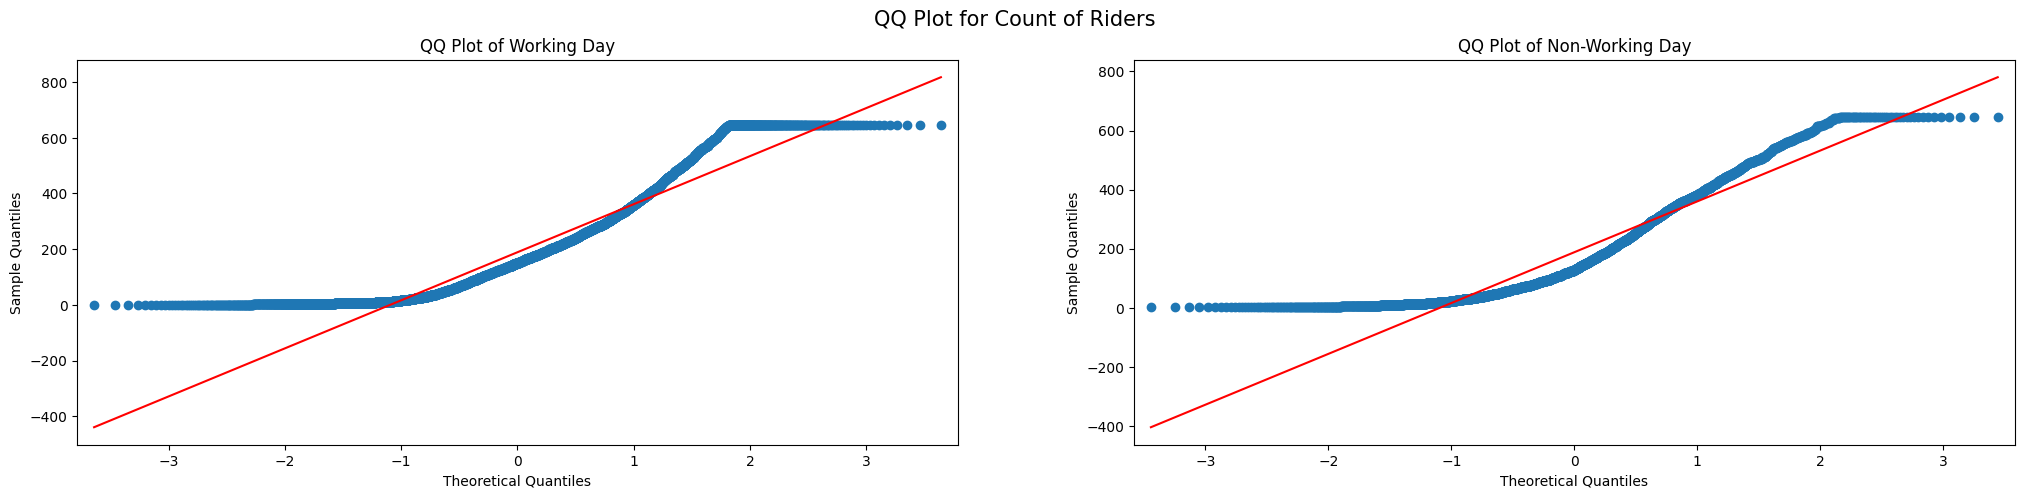

In [ ]:
# QQ Plot
plt.figure(figsize=(25, 5))
plt.suptitle('QQ Plot for Count of Riders', fontsize=15)
plt.subplot(121)
qqplot(workingDay_df, line='s', ax=plt.gca())
plt.title('QQ Plot of Working Day')
plt.subplot(122)
qqplot(nonWorkingDay_df, line='s', ax=plt.gca())
plt.title('QQ Plot of Non-Working Day')
plt.show()

In [ ]:
# Shapiro-Wilk Test for Normality
# H0: The data is normally distributed
# H1: The data is not normally distributed
stat, p = shapiro(workingDay_df)
print(f'Shapiro-Wilk Test for Working Day: \nStatistics={stat}, p-value={p}')
if p > 0.05:
    print('At 95% Confidence Interval, Working Day is Normally Distributed\n')
else:
    print('At 95% Confidence Interval, Working Day is Not Normally Distributed')

print('-'*50)

stat, p = shapiro(nonWorkingDay_df)
print(f'Shapiro-Wilk Test for Non-Working Day: \nStatistics={stat}, p-value={p}')
if p > 0.05:
    print('At 95% Confidence Interval, Non-Working Day is Normally Distributed\n')
else:
    print('At 95% Confidence Interval, Non-Working Day is Not Normally Distributed')


Shapiro-Wilk Test for Working Day: 
Statistics=0.8863904293195669, p-value=7.23783468271281e-59
At 95% Confidence Interval, Working Day is Not Normally Distributed
--------------------------------------------------
Shapiro-Wilk Test for Non-Working Day: 
Statistics=0.8844793251867066, p-value=3.5436366281973996e-45
At 95% Confidence Interval, Non-Working Day is Not Normally Distributed


In [ ]:
# Levene's Test for Homogeneity of Variance
# H0: Variances are Homogeneous
# H1: Variances are Not Homogeneous
stat, p = levene(workingDay_df, nonWorkingDay_df)
print(f'Levene\'s Test for Homogeneity of Variance: \nStatistics={stat}, p-value={p}')
if p > 0.05:
    print('At 95% Confidence Interval, Variances are Homogeneous\n')
else:
    print('At 95% Confidence Interval, Variances are Not Homogeneous')


Levene's Test for Homogeneity of Variance: 
Statistics=2.2064263994748616, p-value=0.13746567793793213
At 95% Confidence Interval, Variances are Homogeneous



<Axes: xlabel='count', ylabel='Density'>

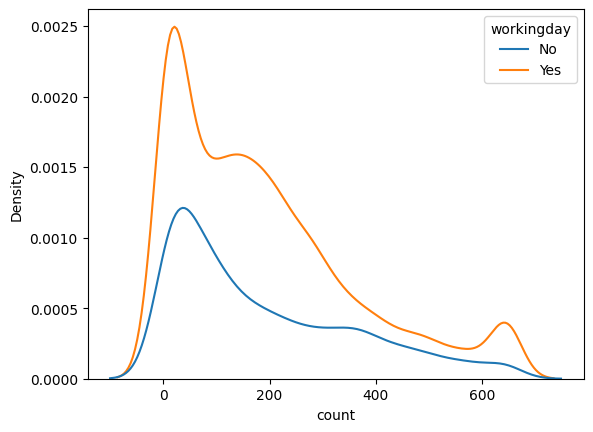

In [ ]:
sns.kdeplot(data = df, x = 'count', hue = 'workingday')

Insights:
- Based on QQ Plot and Shapiro Wilk test, the data is not normally distributed.
- Based on Levene's Test, the data is homoscedastic.
- Since, it's not normally distributed, T-Test is not the good approach. But, will try that out for now.
- We can try Kruskal Wallis Test to check the effect of Working Day on the number of electric cycles rented.

In [ ]:
t_stat, p_val = ttest_ind(workingDay_df, nonWorkingDay_df)
print(f'T-Test for Working Day and Non-Working Day: \nT-Statistic={t_stat}, p-value={p_val}')
if p_val > 0.05:
    print('At 95% Confidence Interval, Fail to Reject Null Hypothesis\n')
else:
    print('At 95% Confidence Interval, Reject Null Hypothesis')

T-Test for Working Day and Non-Working Day: 
T-Statistic=0.3163260408231243, p-value=0.7517611135576576
At 95% Confidence Interval, Fail to Reject Null Hypothesis



Insights:
- Based on the results, the p-value is greater than 0.05. Hence, we fail to reject the null hypothesis.
- Statistically, Working Day has no effect on the number of electric cycles rented.

In [ ]:
# Kruskal-Wallis Test
# H0: The means of the samples are equal
# H1: The means of the samples are not equal
stat, p = kruskal(workingDay_df, nonWorkingDay_df)
print(f'Kruskal-Wallis Test for Working Day and Non-Working Day: \nStatistics={stat}, p-value={p}')
if p > 0.05:
    print('At 95% Confidence Interval, Fail to Reject Null Hypothesis\n')
else:
    print('At 95% Confidence Interval, Reject Null Hypothesis')


Kruskal-Wallis Test for Working Day and Non-Working Day: 
Statistics=0.004466000037482505, p-value=0.9467185225378246
At 95% Confidence Interval, Fail to Reject Null Hypothesis



Insights:
- Based on the results, the p-value is greater than 0.05. Hence, we fail to reject the null hypothesis.
- Statistically, Working Day has no effect on the number of electric cycles rented.


### No. of cycles rented similar or different in different seasons

One Way ANOVA Test will be the suitable test to check the effect of Season on cycle rental. Since, there are more than 2 categories in the Season variable, we can't use T-Test.

Assumptions for One Way ANOVA Test:
- The data is normally distributed.
- The data is homoscedastic. This means that the variance in the data is equal.
- The data is independent.

Step 1: Define the null hypothesis and alternative hypothesis
- Null Hypothesis: Season has no effect on the number of electric cycles rented.
- Alternative Hypothesis: Season has an effect on the number of electric cycles rented.


Step 2: Checking the basic assumptions
- To check the normal distribution, will use QQ Plot and Shapiro.
- To check the variance, will use Levene's Test.


Step 3: Fix the significance level
- Significance Level: 0.05

Step 4: Perform the test

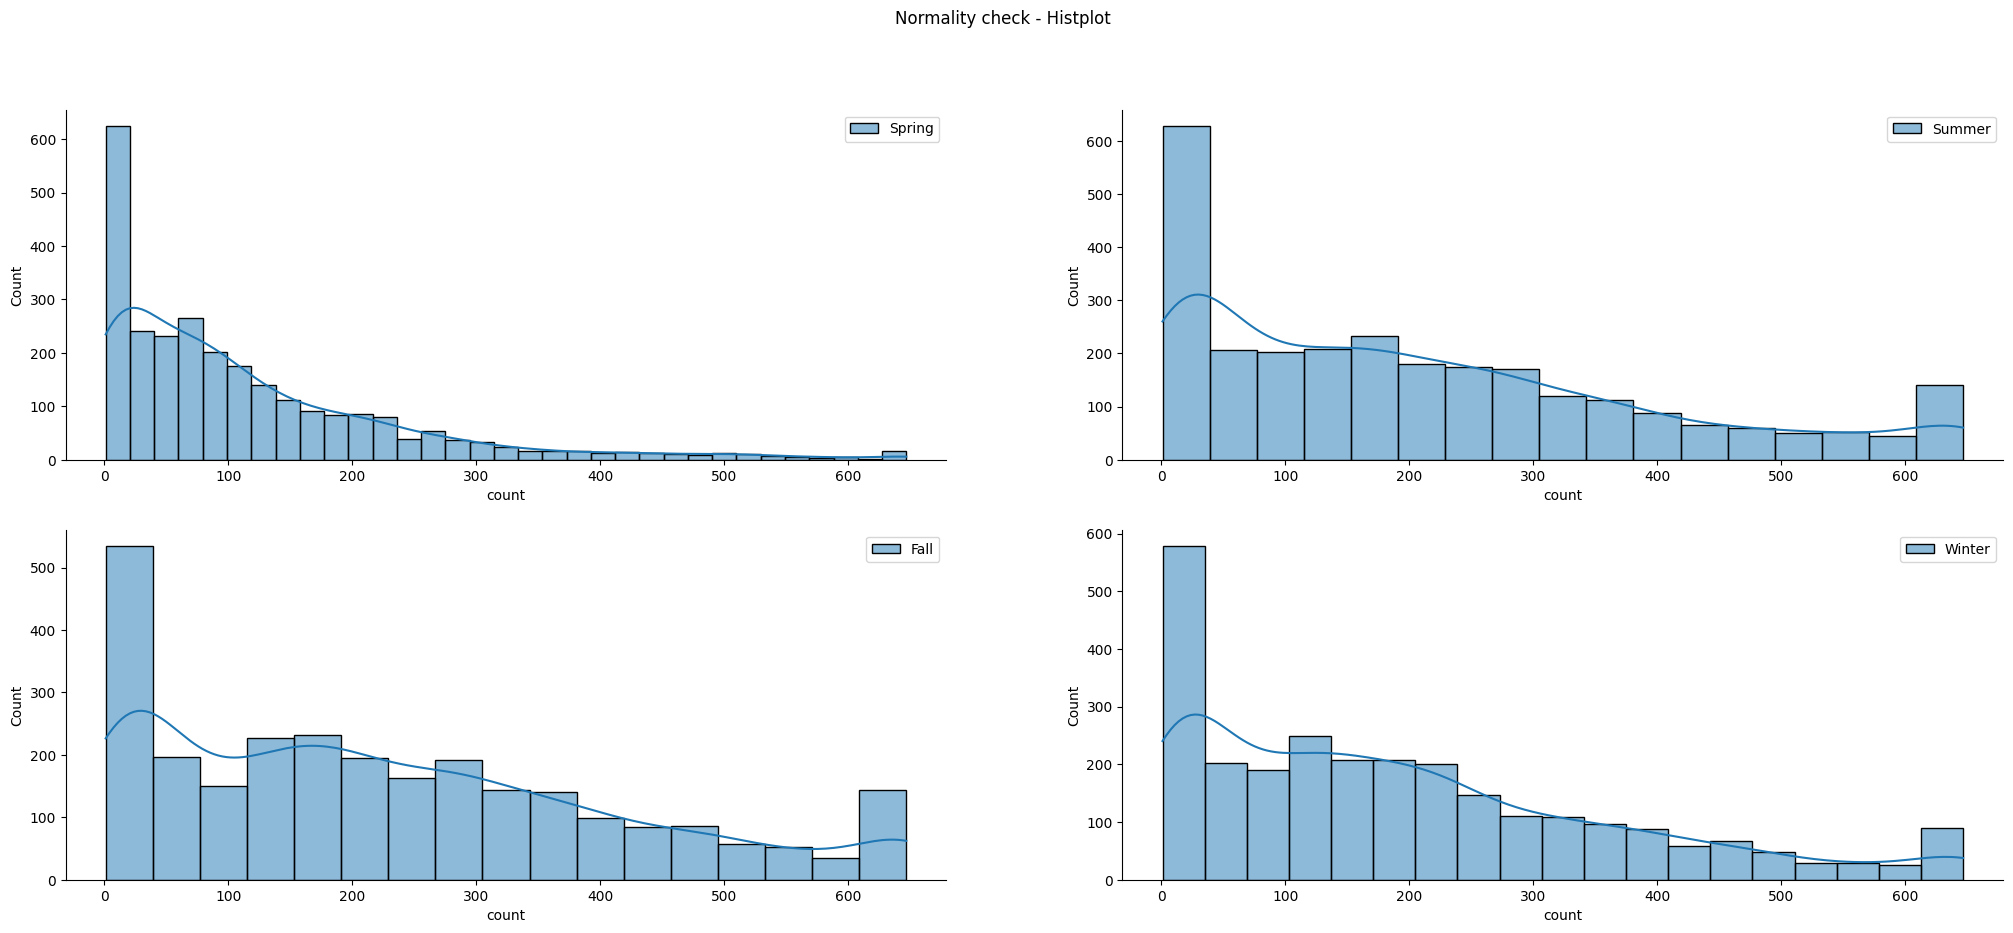

In [ ]:
# histogram for the season
plt.figure(figsize = (25, 10))
plt.suptitle("Normality check - Histplot")
plt.subplot(221)
sns.histplot(df[df['season'] == 'Spring']['count'], kde = True, label = 'Spring')
plt.legend()
plt.subplot(222)
sns.histplot(df[df['season'] == 'Summer']['count'], kde = True, label = 'Summer')
plt.legend()
plt.subplot(223)
sns.histplot(df[df['season'] == 'Fall']['count'], kde = True, label = 'Fall')
plt.legend()
plt.subplot(224)
sns.histplot(df[df['season'] == 'Winter']['count'], kde = True, label = 'Winter')
plt.legend()
sns.despine()
plt.show()

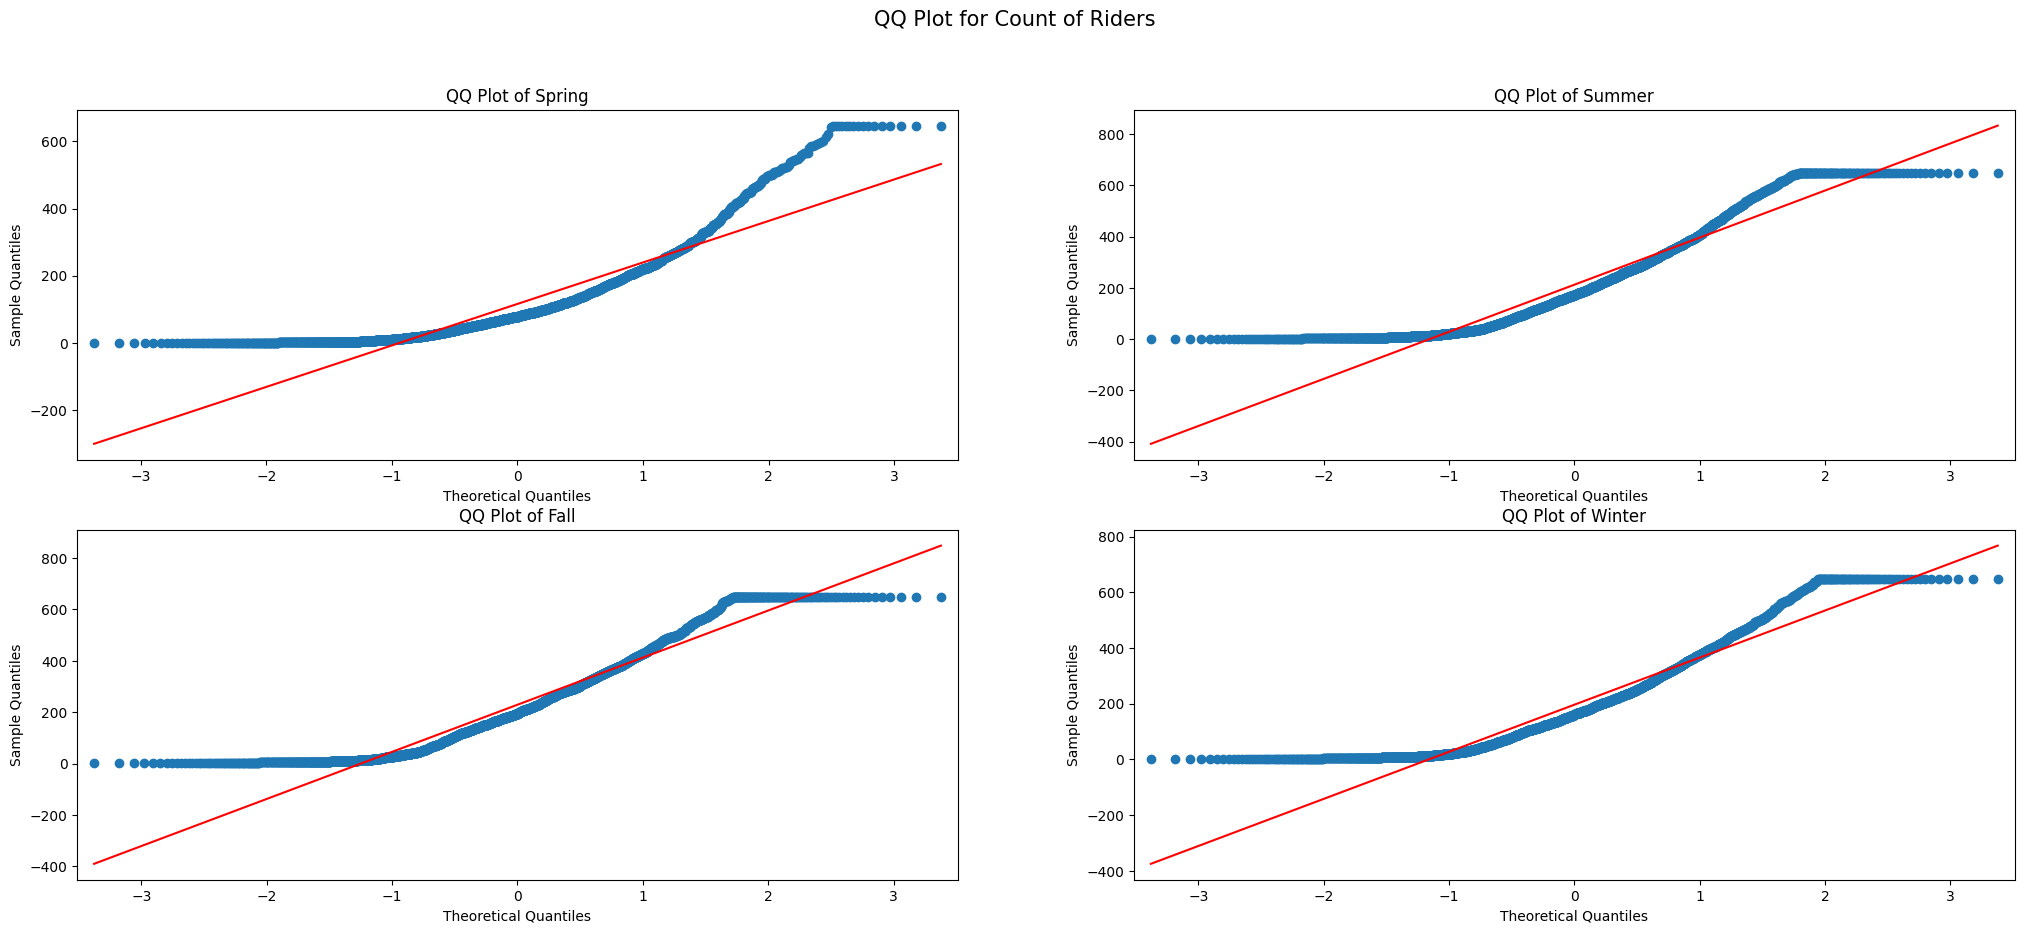

In [ ]:
# QQ Plot
plt.figure(figsize=(25, 10))
plt.suptitle('QQ Plot for Count of Riders', fontsize=15)
plt.subplot(221)
qqplot(df[df['season'] == 'Spring']['count'], line='s', ax=plt.gca())
plt.title('QQ Plot of Spring')
plt.subplot(222)
qqplot(df[df['season'] == 'Summer']['count'], line='s', ax=plt.gca())
plt.title('QQ Plot of Summer')
plt.subplot(223)
qqplot(df[df['season'] == 'Fall']['count'], line='s', ax=plt.gca())
plt.title('QQ Plot of Fall')
plt.subplot(224)
qqplot(df[df['season'] == 'Winter']['count'], line='s', ax=plt.gca())
plt.title('QQ Plot of Winter')
plt.show()

In [ ]:
seasons = ['Spring', 'Summer', 'Fall', 'Winter']

for season in seasons:
    stat, p = shapiro(df[df['season'] == season]['count'])
    print(f'Shapiro-Wilk Test for {season}: \nStatistics={stat}, p-value={p}')
    if p > 0.05:
        print(f'At 95% Confidence Interval, {season} is Normally Distributed\n')
    else:
        print(f'At 95% Confidence Interval, {season} is Not Normally Distributed\n')
    print('-'*50)


Shapiro-Wilk Test for Spring: 
Statistics=0.8147439669582819, p-value=2.911832456142803e-48
At 95% Confidence Interval, Spring is Not Normally Distributed

--------------------------------------------------
Shapiro-Wilk Test for Summer: 
Statistics=0.9027969745797303, p-value=1.330654757710811e-38
At 95% Confidence Interval, Summer is Not Normally Distributed

--------------------------------------------------
Shapiro-Wilk Test for Fall: 
Statistics=0.9245845072616039, p-value=5.278352927405941e-35
At 95% Confidence Interval, Fall is Not Normally Distributed

--------------------------------------------------
Shapiro-Wilk Test for Winter: 
Statistics=0.9057489057257019, p-value=3.6766046654389127e-38
At 95% Confidence Interval, Winter is Not Normally Distributed

--------------------------------------------------


In [ ]:
# Levene's Test for Homogeneity of Variance
# H0: Variances are Homogeneous
# H1: Variances are Not Homogeneous
stat, p = levene(df[df['season'] == 'Spring']['count'], df[df['season'] == 'Summer']['count'], df[df['season'] == 'Fall']['count'], df[df['season'] == 'Winter']['count'])
print(f'Levene\'s Test for Homogeneity of Variance: \nStatistics={stat}, p-value={p}')
if p > 0.05:
    print('At 95% Confidence Interval, Variances are Homogeneous\n')
else:
    print('At 95% Confidence Interval, Variances are Not Homogeneous\n')


Levene's Test for Homogeneity of Variance: 
Statistics=199.5119672794296, p-value=5.7233179707619984e-126
At 95% Confidence Interval, Variances are Not Homogeneous



<Axes: xlabel='count', ylabel='Density'>

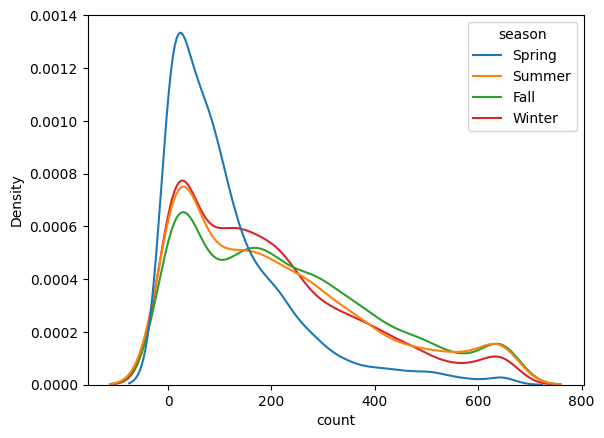

In [ ]:
sns.kdeplot(data = df, x = 'count', hue = 'season')

Insights:
- Based on QQ Plot and Shapiro Wilk test, the data is not normally distributed.
- Based on Levene's Test, the variance is not equal.
- Since, it's not normally distributed, ANOVA Test is not the good approach. But, will try that out for now.
- We can try Kruskal Wallis Test to check the effect of Season on the number of electric cycles rented.

In [ ]:
# one way anova
# H0: The means of the samples are equal
# H1: The means of the samples are not equal
stat, p = f_oneway(df[df['season'] == 'Spring']['count'], df[df['season'] == 'Summer']['count'], df[df['season'] == 'Fall']['count'], df[df['season'] == 'Winter']['count'])
print(f'One-Way ANOVA Test for Season: \nStatistics={stat}, p-value={p}')
if p > 0.05:
    print('At 95% Confidence Interval, Fail to Reject Null Hypothesis\n')
else:
    print('At 95% Confidence Interval, Reject Null Hypothesis\n')

One-Way ANOVA Test for Season: 
Statistics=243.33766355201303, p-value=7.771506553957677e-153
At 95% Confidence Interval, Reject Null Hypothesis



In [ ]:
# Kruskal-Wallis Test
# H0: The means of the samples are equal
# H1: The means of the samples are not equal
stat, p = kruskal(df[df['season'] == 'Spring']['count'], df[df['season'] == 'Summer']['count'], df[df['season'] == 'Fall']['count'], df[df['season'] == 'Winter']['count'])
print(f'Kruskal-Wallis Test for Season: \nStatistics={stat}, p-value={p}')
if p > 0.05:
    print('At 95% Confidence Interval, Fail to Reject Null Hypothesis\n')
else:
    print('At 95% Confidence Interval, Reject Null Hypothesis\n')

Kruskal-Wallis Test for Season: 
Statistics=699.2817665514561, p-value=3.0045514163996123e-151
At 95% Confidence Interval, Reject Null Hypothesis



Insights:
- Based on the results, the p-value is less than 0.05. Hence, we reject the null hypothesis.
- Statistically, Season has an effect on the number of electric cycles rented.


### No. of cycles rented similar or different in different weather

One Way ANOVA Test will be the suitable test to check the effect of Weather on cycle rental. Since, there are more than 2 categories in the Weather variable, we can't use T-Test.

Assumptions for One Way ANOVA Test:
- The data is normally distributed.
- The data is homoscedastic. This means that the variance in the data is equal.
- The data is independent.

Step 1: Define the null hypothesis and alternative hypothesis
- Null Hypothesis: Weather has no effect on the number of electric cycles rented.
- Alternative Hypothesis: Weather has an effect on the number of electric cycles rented.

Step 2: Checking the basic assumptions
- To check the normal distribution, will use QQ Plot and Shapiro.
- To check the variance, will use Levene's Test.

Step 3: Fix the significance level
- Significance Level: 0.05

Step 4: Perform the test

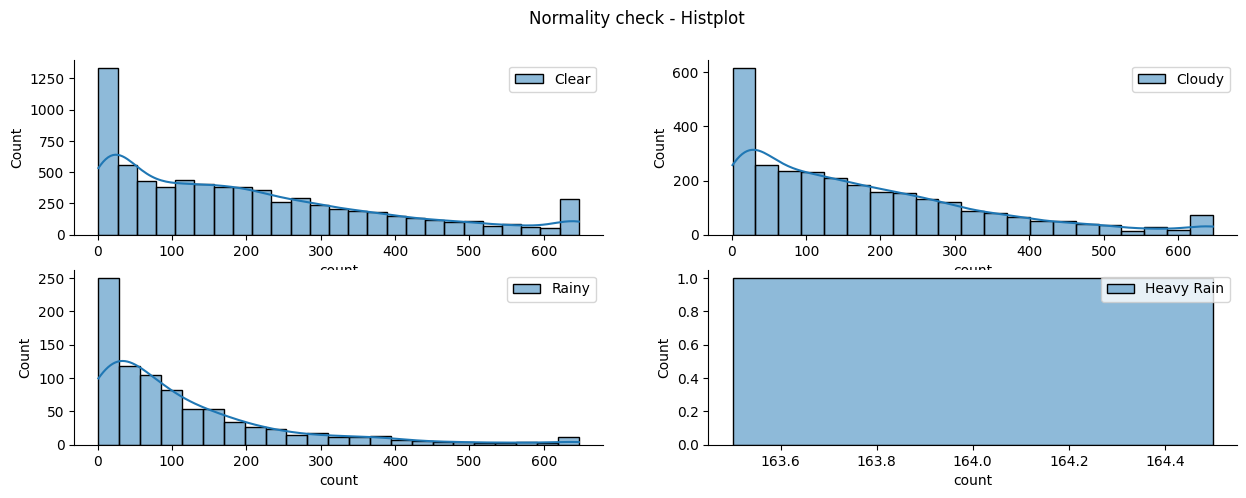

In [ ]:
# Histogram for the weather
plt.figure(figsize = (15, 5))
plt.suptitle("Normality check - Histplot")
plt.subplot(221)
sns.histplot(df[df['weather'] == 'Clear']['count'], kde = True, label = 'Clear')
plt.legend()
plt.subplot(222)
sns.histplot(df[df['weather'] == 'Cloudy']['count'], kde = True, label = 'Cloudy')
plt.legend()
plt.subplot(223)
sns.histplot(df[df['weather'] == 'Rainy']['count'], kde = True, label = 'Rainy')
plt.legend()
plt.subplot(224)
sns.histplot(df[df['weather'] == 'Heavy Rain']['count'], kde = True, label = 'Heavy Rain')
plt.legend()
sns.despine()
plt.show()

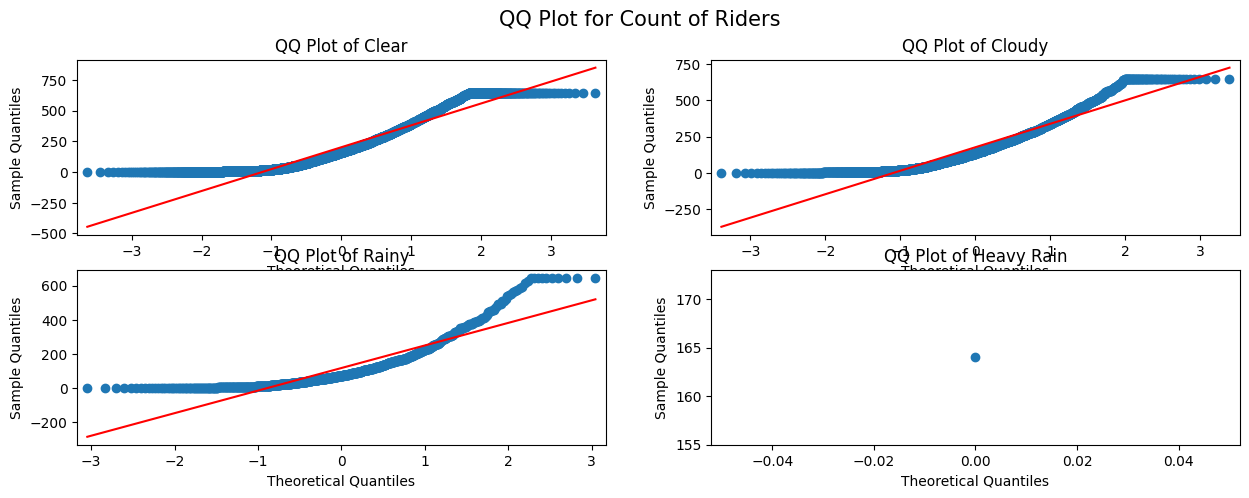

In [ ]:
# QQ Plot
plt.figure(figsize=(15, 5))
plt.suptitle('QQ Plot for Count of Riders', fontsize=15)
plt.subplot(221)
qqplot(df[df['weather'] == 'Clear']['count'], line='s', ax=plt.gca())
plt.title('QQ Plot of Clear')
plt.subplot(222)
qqplot(df[df['weather'] == 'Cloudy']['count'], line='s', ax=plt.gca())
plt.title('QQ Plot of Cloudy')
plt.subplot(223)
qqplot(df[df['weather'] == 'Rainy']['count'], line='s', ax=plt.gca())
plt.title('QQ Plot of Rainy')
plt.subplot(224)
qqplot(df[df['weather'] == 'Heavy Rain']['count'], line='s', ax=plt.gca())
plt.title('QQ Plot of Heavy Rain')
plt.show()

In [ ]:
# Shapiro-Wilk Test for Normality
# H0: The data is normally distributed
# H1: The data is not normally distributed
weathers = ['Clear', 'Cloudy', 'Rainy', 'Heavy Rain']

for weather in weathers:
    # Check if the number of data points is greater than 3 before performing the test
    if len(df[df['weather'] == weather]['count']) >= 3:
        stat, p = shapiro(df[df['weather'] == weather]['count'])
        print(f'Shapiro-Wilk Test for {weather}: \nStatistics={stat}, p-value={p}')
        if p > 0.05:
            print(f'At 95% Confidence Interval, {weather} is Normally Distributed\n')
        else:
            print(f'At 95% Confidence Interval, {weather} is Not Normally Distributed\n')
        print('-'*50)
    else:
        print(f"Shapiro-Wilk test not performed for {weather} due to insufficient data points (less than 3).")
        print('-'*50)

Shapiro-Wilk Test for Clear: 
Statistics=0.8987712937101245, p-value=3.723807000853401e-56
At 95% Confidence Interval, Clear is Not Normally Distributed

--------------------------------------------------
Shapiro-Wilk Test for Cloudy: 
Statistics=0.8865389098401227, p-value=1.7719335162413008e-41
At 95% Confidence Interval, Cloudy is Not Normally Distributed

--------------------------------------------------
Shapiro-Wilk Test for Rainy: 
Statistics=0.7886690347994032, p-value=6.40167565957445e-32
At 95% Confidence Interval, Rainy is Not Normally Distributed

--------------------------------------------------
Shapiro-Wilk test not performed for Heavy Rain due to insufficient data points (less than 3).
--------------------------------------------------


In [ ]:
# Levene's Test for Homogeneity of Variance
# H0: Variances are Homogeneous
# H1: Variances are Not Homogeneous
stat, p = levene(df[df['weather'] == 'Clear']['count'], df[df['weather'] == 'Cloudy']['count'], df[df['weather'] == 'Rainy']['count'], df[df['weather'] == 'Heavy Rain']['count'])
print(f'Levene\'s Test for Homogeneity of Variance: \nStatistics={stat}, p-value={p}')
if p > 0.05:
    print('At 95% Confidence Interval, Variances are Homogeneous\n')
else:
    print('At 95% Confidence Interval, Variances are Not Homogeneous\n')


Levene's Test for Homogeneity of Variance: 
Statistics=59.78620431801216, p-value=2.499984328437755e-38
At 95% Confidence Interval, Variances are Not Homogeneous



<Axes: xlabel='count', ylabel='Density'>

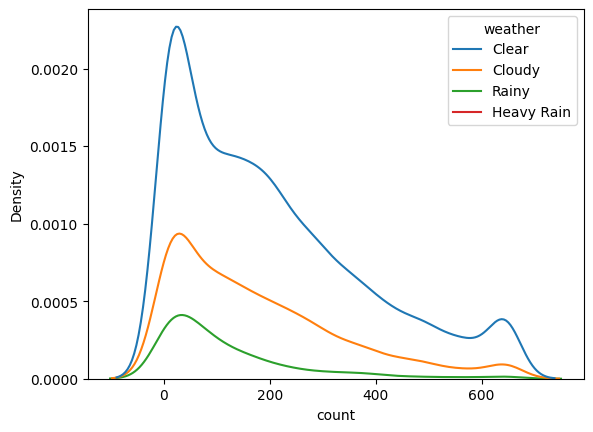

In [ ]:
sns.kdeplot(data = df, x = 'count', hue = 'weather')

Insights:
- Based on QQ Plot and Shapiro Wilk test, the data is not normally distributed.
- Based on Levene's Test, the variance is not equal.
- Since, it's not normally distributed, ANOVA Test is not the good approach. But, will try that out for now.
- We can try Kruskal Wallis Test to check the effect of Weather on the number of electric cycles rented.

In [ ]:
# one way anova
# H0: The means of the samples are equal
# H1: The means of the samples are not equal
stat, p = f_oneway(df[df['weather'] == 'Clear']['count'], df[df['weather'] == 'Cloudy']['count'], df[df['weather'] == 'Rainy']['count'], df[df['weather'] == 'Heavy Rain']['count'])
print(f'One-Way ANOVA Test for Weather: \nStatistics={stat}, p-value={p}')
if p > 0.05:
    print('At 95% Confidence Interval, Fail to Reject Null Hypothesis\n')
else:
    print('At 95% Confidence Interval, Reject Null Hypothesis\n')


One-Way ANOVA Test for Weather: 
Statistics=68.4116520342703, p-value=8.034967610817961e-44
At 95% Confidence Interval, Reject Null Hypothesis



In [ ]:
# Kruskal-Wallis Test
# H0: The means of the samples are equal
# H1: The means of the samples are not equal
stat, p = kruskal(df[df['weather'] == 'Clear']['count'], df[df['weather'] == 'Cloudy']['count'], df[df['weather'] == 'Rainy']['count'], df[df['weather'] == 'Heavy Rain']['count'])
print(f'Kruskal-Wallis Test for Weather: \nStatistics={stat}, p-value={p}')
if p > 0.05:
    print('At 95% Confidence Interval, Fail to Reject Null Hypothesis\n')
else:
    print('At 95% Confidence Interval, Reject Null Hypothesis\n')

Kruskal-Wallis Test for Weather: 
Statistics=205.04853208154285, p-value=3.421748763291878e-44
At 95% Confidence Interval, Reject Null Hypothesis



Insights:
- Based on the results, the p-value is less than 0.05. Hence, we reject the null hypothesis.
- Statistically, Weather has an effect on the number of electric cycles rented.


### Weather is dependent on season (check between 2 predictor variable)

Chi-Square Test will be the suitable test to check the dependency between Weather and Season. Since, both the variables are categorical, we can use Chi-Square Test.

Assumptions for Chi-Square Test:
- The data is independent.
- The data is categorical.

Step 1: Define the null hypothesis and alternative hypothesis
- Null Hypothesis: Weather is independent of Season.
- Alternative Hypothesis: Weather is dependent on Season.

Step 2: Fix the significance level
- Significance Level: 0.05

Step 3: Perform the test

In [ ]:
contingency_table = pd.crosstab(df['weather'], df['season'])
contingency_table

season,Spring,Summer,Fall,Winter
weather,,,,
Clear,1759,1801,1930,1702
Cloudy,715,708,604,807
Rainy,211,224,199,225
Heavy Rain,1,0,0,0


In [ ]:
# Chi-Square Test
# H0: The variables are independent
# H1: The variables are dependent
stat, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square Test for Weather and Season: \nStatistics={stat}, p-value={p}')
if p > 0.05:
    print('At 95% Confidence Interval, Fail to Reject Null Hypothesis\n')
else:
    print('At 95% Confidence Interval, Reject Null Hypothesis\n')

Chi-Square Test for Weather and Season: 
Statistics=49.15865559689363, p-value=1.5499250736864862e-07
At 95% Confidence Interval, Reject Null Hypothesis



Insights:
- Based on the results, the p-value is less than 0.05. Hence, we reject the null hypothesis.
- Statistically, Weather is dependent on Season.

Conclusion

- Working Day has no effect on the number of electric cycles rented.
- Season has an effect on the number of electric cycles rented.
- Weather has an effect on the number of electric cycles rented.
- Weather is dependent on Season.


Business Insights:
- Bike rentals peak in summer and drop significantly during winter.
- Clear weather leads to the highest rentals, while adverse conditions like rain, snow, and fog reduce demand.
- Seasonal variations in temperature, humidity, and windspeed influence rental counts.
- Rentals decrease on holidays and weekends but surge on non-working days, with consistent demand on working days.
- Casual riders dominate on weekends, while registered users are more active during weekdays.
- Strong seasonal trends show peak rentals in spring and summer, with a decline in fall and winter.







Recommendations:
- Focus marketing efforts during high-demand seasons like spring and summer to maximize impact.
- Introduce exclusive seasonal offers and promotions to boost sales.
- Collect data on extreme weather to better understand customer preferences.
- Consider offering weather-adapted bike models or safety features for varying conditions.
- Launch targeted promotional campaigns based on favorable weather, such as clear or partly cloudy days.
- Develop loyalty programs and personalized incentives to engage casual and registered users.
- Provide comfort-enhancing amenities, such as rain gear, to improve the customer experience.





